In [1]:
#import packages for data analysis 
import pandas as pd
import os 
import numpy as np  
import matplotlib.pyplot as plt 

In [2]:
#import the data 
bh = pd.read_csv('houses_to_rent_v2.csv')

I am fascinated by Brazil and am a Lusophone. When I found the the Brazilian housing dataset on Kaggle, I downloaded it and thought that it would present a good opportunity for the first capstone project for this course. I was interested in developing a model to predict the housing prices in Brazil. I thought that a model that  accounted for  the city, the area of the house, the number of rooms, and nuber bathrooms should predict the rent. Since, the model is seeking to predict a continuous numerical variable, I decided that multiple regression would be the best machine learning method to use. 

In [3]:
s_bh = bh[['rent amount (R$)', 'area', 'rooms', 'bathroom','floor','hoa (R$)',
           'property tax (R$)', 'fire insurance (R$)']]

Lets look at the distribtions of the variables in question to determine if we should transform the variables prior to using them in predictions

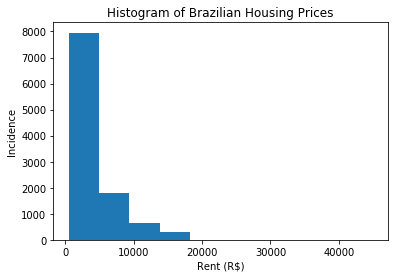

In [4]:
plt.hist(bh['rent amount (R$)'])
plt.title('Histogram of Brazilian Housing Prices')
plt.xlabel('Rent (R$)')
plt.ylabel('Incidence')
plt.show()

The distribution appears to be log-normal. Let's look at the logarithm of the rent.

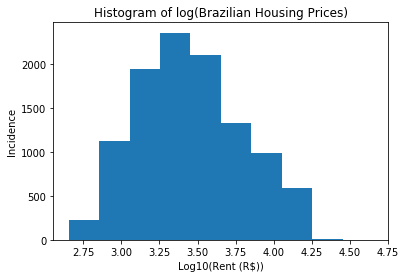

In [5]:
plt.hist(np.log10(bh['rent amount (R$)']))
plt.title('Histogram of log(Brazilian Housing Prices)')
plt.xlabel('Log10(Rent (R$))')
plt.ylabel('Incidence')
plt.show()

The distribution now appears to be much closer to a normal distribution

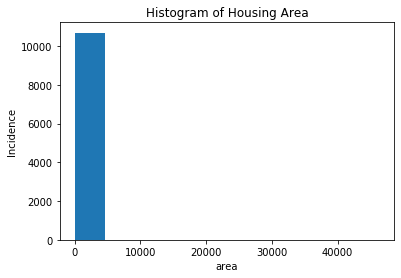

In [6]:
plt.hist(bh['area'])
plt.title('Histogram of Housing Area')
plt.xlabel('area')
plt.ylabel('Incidence')
plt.show()

The area of the of the houses is may also be log-normally distributed. Let's look at the log-normal.

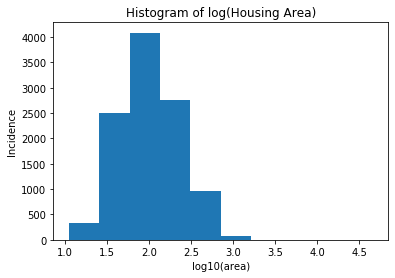

In [7]:
plt.hist(np.log10(bh['area']))
plt.title('Histogram of log(Housing Area)')
plt.xlabel('log10(area)')
plt.ylabel('Incidence')
plt.show()

The distribution now appears to be much closer to a normal distribution. 

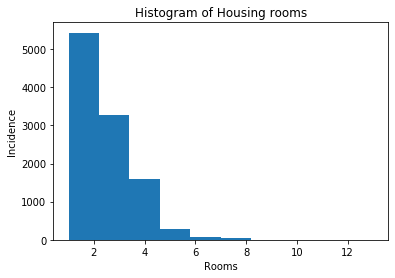

In [8]:
plt.hist(bh['rooms'])
plt.title('Histogram of Housing rooms')
plt.xlabel('Rooms')
plt.ylabel('Incidence')
plt.show()

Rooms may also benefit from a logarithmic transformation

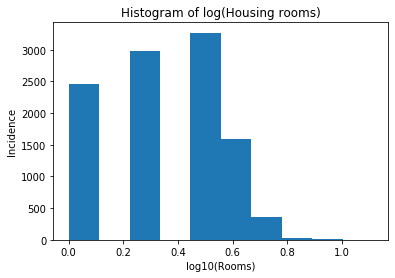

In [9]:
plt.hist(np.log10(bh['rooms']))
plt.title('Histogram of log(Housing rooms)')
plt.xlabel('log10(Rooms)')
plt.ylabel('Incidence')
plt.show()

Room number is not exactly normal after a logarithmic transformation, but still much more closely approximates a normal distribution. So rent, room number, and housing area should have the log of the populations taken before being used in a linear regression model. 

I expect the number of bathrooms to contribute to housing prices in a much smaller way than the other variables of interest. There are five cities in the data set, so will convert them to numerical values before creating the model. 

In [10]:
s_bh = bh[['rent amount (R$)', 'area', 'rooms', 'bathroom','floor','hoa (R$)',
           'property tax (R$)', 'fire insurance (R$)']]

#transforming categorical variables into numerical categories
s_bh['num_city'] = bh.city.astype('category').cat.codes
s_bh['num_furn'] = bh.furniture.astype('category').cat.codes
s_bh['num_an'] = bh.animal.astype('category').cat.codes
s_bh['num_fl'] = bh.floor.astype('category').cat.codes

C:\Users\websterkgd\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\websterkgd\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\websterkgd\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [11]:
#import Linear Regression
from sklearn.linear_model import LinearRegression

In [12]:
# Create feature and target arrays
X = s_bh[['num_city', 'area', 'rooms', 'bathroom']]
X['area'] = np.log10(X['area'])
X['rooms'] = np.log10(X['rooms'])
y = np.log10(s_bh[['rent amount (R$)']])

C:\Users\websterkgd\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\websterkgd\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
#create training and test sets

#training set
Xtr = X.iloc[0:7484,:] 
ytr = y.iloc[0:7484,:]

#test set
Xte = X.iloc[7485:len(X['num_city']),:] 
yte = y.iloc[7485:len(y),:]

In [14]:
#create the linear regression model
from sklearn.linear_model import LinearRegression
#linear regression model
regressor = LinearRegression()  
regressor.fit(Xtr, ytr)

#view OLS print out
#model through OLS method 
from statsmodels.formula.api import ols
m = pd.concat([Xtr, ytr], axis =1)
lr = ols('m.iloc[:,4] ~ m.iloc[:,0:3]',m).fit()
print(lr.summary()) 

                            OLS Regression Results                            
Dep. Variable:           m.iloc[:, 4]   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     3539.
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        00:40:19   Log-Likelihood:                 686.74
No. Observations:                7484   AIC:                            -1365.
Df Residuals:                    7480   BIC:                            -1338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8410      0.02

This model is describing 59 % of the variance on the training set

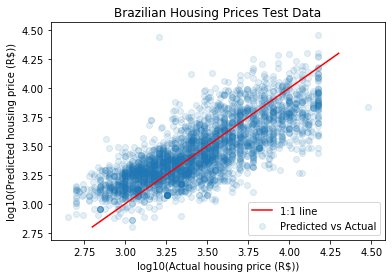

In [15]:
#plotting how the model does on the test data
#predict the test values
y_pred = regressor.predict(Xte)

# creating 1 to 1 line for plotting
#o = np.linspace(500,20000,5)
lo = np.linspace(2.8,4.3,5)
#plt.plot(o, o, '-r', label='1:1 line')
plt.plot(lo, lo, '-r', label='1:1 line')

#plotting for re
plt.scatter(yte, y_pred, alpha =0.12, label ='Predicted vs Actual')
plt.xlabel('log10(Actual housing price (R$))')
plt.ylabel('log10(Predicted housing price (R$))')
plt.title('Brazilian Housing Prices Test Data')
plt.legend()
plt.show()

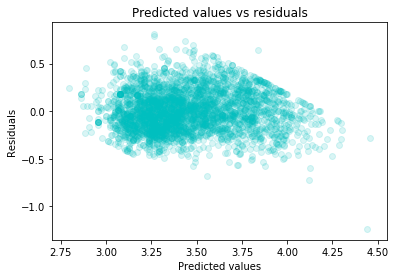

In [16]:
#residual plot
plt.scatter(y_pred, yte-y_pred, alpha = 0.15, color = 'c')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.title('Predicted values vs residuals')
plt.show()

The model perhaps overpredicts the housing prices at the low end and underpredicts higher housing values, but overall does pretty well against data it hasn't seen before.

In my analysis, I noticed that information on the fire insurance of each unit was also collected. I wondered how a model based solely on the fire insurance of each unit would do.

In [17]:
###predicting using only fire insurance
# Create feature and target arrays
F = np.log10(bh['fire insurance (R$)']+1)
y = np.log10(s_bh[['rent amount (R$)']])

In [18]:
#training set
Ftr = F[0:7484] 

#test set
Fte = F[7485:len(F)] 

In [19]:
#crate a linear regression model and predict on the test set

#linear regression model
regressor_f = LinearRegression()  
Ftn = Ftr.to_numpy()
Ftn = Ftn.reshape(-1, 1) 
regressor_f.fit(Ftn, ytr)

#predict the test data
Ften = Fte.to_numpy()
Ften= Ften.reshape(-1, 1) 
yf_pred = regressor_f.predict(Ften)

In [20]:
#check model performance
mf = pd.concat([Ftr, ytr], axis =1)
lr_f = ols('mf.iloc[:,0] ~ mf.iloc[:,1]',mf).fit()
print(lr_f.summary()) 

                            OLS Regression Results                            
Dep. Variable:          mf.iloc[:, 0]   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 2.678e+05
Date:                Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                        00:40:20   Log-Likelihood:                 11012.
No. Observations:                7484   AIC:                        -2.202e+04
Df Residuals:                    7482   BIC:                        -2.201e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.7416      0.006   -268.466

The model is capturing 97% of the variance in the rent for each unit!

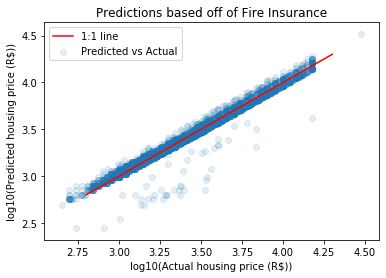

In [21]:
#plotting the model based on Fire Insurance alone on the test data
plt.plot(lo, lo, '-r', label='1:1 line')
plt.scatter(yte, yf_pred, alpha =0.12, label ='Predicted vs Actual')
plt.xlabel('log10(Actual housing price (R$))')
plt.ylabel('log10(Predicted housing price (R$))')
plt.title('Predictions based off of Fire Insurance')
plt.legend()
plt.show()

The above plot shows that a model based solely off of the fire insurance of a unit does far better than taking into account things the area of the house, the bathrooms, city, and number of rooms. Instead the cost of fire insurance is likely capturing the exact value of the unit in a way that the rent is also reflective of the value of the unit. 